In [2]:
'''
Format being used : 

{
    PathFileType : "",
    DataRate : "",
    CameraRate : "",
    .....
    Frame : [],
    Time : [],
    Neck : {
            x : [],
            y : [],
            z : []
    },
    RShoulder : {
        x : [],
        y : [],
        z : []
    },
    RElbow : {
        x : [],
        y : [],
        z : []
    }
}
'''

'\nFormat being used : \n\n{\n    PathFileType : "",\n    DataRate : "",\n    CameraRate : "",\n    .....\n    Frame : [],\n    Time : [],\n    Neck : {\n            x : [],\n            y : [],\n            z : []\n    },\n    RShoulder : {\n        x : [],\n        y : [],\n        z : []\n    },\n    RElbow : {\n        x : [],\n        y : [],\n        z : []\n    }\n}\n'

In [3]:
def readMarkerData(file_path):
    data = ""
    pathFile = ""
    ex_title_list = []
    ex_data_list = []
    titles = []

    data = []
    with open(file_path) as file:
        count = 0
        for line in file:
            if(count==0):
                l = line.split(" ")
#                 print(l)
                pathFile = l[3]
            elif(count == 1):
                l = line.split("\t")
                ex_title_list = l
            elif(count == 2):
                l = line.split("\t")
                ex_data_list = l
            elif(count == 3):
                l = line.split("\t")
                # Remove spaces from each element using list comprehension
                l = [item for item in l if item != ""]
                titles = l
                # Print the result
#                 print(l)

            elif (count == 4 or count == 5):
                pass

            else:
                l = line.split("\t")
                data.append(l)


            count+=1
#     print(data)
    
    
    last_string = ex_title_list[-1].rstrip('\n')
    ex_title_list[-1] = last_string

    last_string = ex_data_list[-1].rstrip('\n')
    ex_data_list[-1] = last_string
    
    dataDict = {}
    
    dataDict['PathFileType'] = pathFile
    
    
    # dataDict

    # For Data rate, Camera Rate etc
    for i in range(len(ex_title_list)):
        dataDict[ex_title_list[i]] = ex_data_list[i]

    datas = {}

    a = 2
    for i in range(len(data)):
        for j in range(len(data[i])):
            try:
                datas[str(j)].append(data[i][j])
            except:
                datas[str(j)] = [data[i][j]]

#     print(datas)
    # datas['3']
    # For the Titles
    count = 0
    for i in range(len(titles)):
        if(i < 2):
            dataDict[titles[i]] = datas[str(count)]
            count=count+1
        else:
            try:
                dataDict[titles[i]] = {}
                dataDict[titles[i]]['X'] = datas[str(count)]
                dataDict[titles[i]]['Y'] = datas[str(count+1)]
                dataDict[titles[i]]['Z'] = datas[str(count+2)]
                count=count+3
            except:
                pass
    return dataDict

In [4]:
readMarkerData("../DATA/OpenCapData_7272a71a-e70a-4794-a253-39e11cb7542c/MarkerData/run.trc")

{'PathFileType': '/workspace/Data/7272a71a-e70a-4794-a253-39e11cb7542c/MarkerData/PostAugmentation\n',
 'DataRate': '60.0',
 'CameraRate': '60.0',
 'NumFrames': '98',
 'NumMarkers': '63',
 'Units': 'm',
 'OrigDataRate': '60.0',
 'OrigDataStartFrame': '1',
 'OrigNumFrames': '98',
 'Frame#': ['1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '32',
  '33',
  '34',
  '35',
  '36',
  '37',
  '38',
  '39',
  '40',
  '41',
  '42',
  '43',
  '44',
  '45',
  '46',
  '47',
  '48',
  '49',
  '50',
  '51',
  '52',
  '53',
  '54',
  '55',
  '56',
  '57',
  '58',
  '59',
  '60',
  '61',
  '62',
  '63',
  '64',
  '65',
  '66',
  '67',
  '68',
  '69',
  '70',
  '71',
  '72',
  '73',
  '74',
  '75',
  '76',
  '77',
  '78',
  '79',
  '80',
  '81',
  '82',
  '83',
  '84',
  '85',
  '86',
  '87',
  '88',
  '89',
  '90',

In [5]:
def readKinematicsData(file_path):
    dataDict = {}
    titles = []
    data = []
    with open(file_path) as file:
        count = 0
        for line in file:
            if(count == 0 or count == 1 or count == 5 or count == 7 or count == 8 or count == 9):
                pass
            elif(count == 2 or count == 3 or count ==  4):
                l = line.split("=")
                dataDict[l[0]] = l[1]
            elif(count == 6):
                dataDict["Units"] = line
            elif(count == 10):
                l = line.split("\t")
                titles = l
            else:
                l = line.split("\t")
                data.append(l)

            count = count+1
    datas = {}
    for i in range(len(data)):
        for j in range(len(data[i])):
            try:
                datas[str(j)].append(data[i][j])
            except:
                datas[str(j)] = [data[i][j]]
    for i in range(len(titles)):
        dataDict[titles[i]] = datas[str(i)]
    
    return dataDict

### Elbow Rotation Initial Analysis

In [6]:
data = readKinematicsData("C:/Users/Jatin/Desktop/Engineering/ROBOTICS PROGRAM NUS/PROJECT/OpenCAP/DATA/NUS_PROJECT_DATA/OpenSimData/Kinematics/Elbow_Start1.mot")

In [7]:
data

{'nRows': '661\n',
 'nColumns': '36\n',
 'inDegrees': 'yes\n',
 'Units': 'Units are S.I. units (second, meters, Newtons, ...)\n',
 'time': ['      0.00000000',
  '      0.01666670',
  '      0.03333330',
  '      0.05000000',
  '      0.06666670',
  '      0.08333330',
  '      0.10000000',
  '      0.11666670',
  '      0.13333330',
  '      0.15000000',
  '      0.16666670',
  '      0.18333330',
  '      0.20000000',
  '      0.21666670',
  '      0.23333330',
  '      0.25000000',
  '      0.26666670',
  '      0.28333330',
  '      0.30000000',
  '      0.31666670',
  '      0.33333330',
  '      0.35000000',
  '      0.36666670',
  '      0.38333330',
  '      0.40000000',
  '      0.41666670',
  '      0.43333330',
  '      0.45000000',
  '      0.46666670',
  '      0.48333330',
  '      0.50000000',
  '      0.51666670',
  '      0.53333330',
  '      0.55000000',
  '      0.56666670',
  '      0.58333330',
  '      0.60000000',
  '      0.61666670',
  '      0.63333330',
  ' 

In [8]:
time1 = data["time"]
time1 = [float(i) for i in time1]
time1

[0.0,
 0.0166667,
 0.0333333,
 0.05,
 0.0666667,
 0.0833333,
 0.1,
 0.1166667,
 0.1333333,
 0.15,
 0.1666667,
 0.1833333,
 0.2,
 0.2166667,
 0.2333333,
 0.25,
 0.2666667,
 0.2833333,
 0.3,
 0.3166667,
 0.3333333,
 0.35,
 0.3666667,
 0.3833333,
 0.4,
 0.4166667,
 0.4333333,
 0.45,
 0.4666667,
 0.4833333,
 0.5,
 0.5166667,
 0.5333333,
 0.55,
 0.5666667,
 0.5833333,
 0.6,
 0.6166667,
 0.6333333,
 0.65,
 0.6666667,
 0.6833333,
 0.7,
 0.7166667,
 0.7333333,
 0.75,
 0.7666667,
 0.7833333,
 0.8,
 0.8166667,
 0.8333333,
 0.85,
 0.8666667,
 0.8833333,
 0.9,
 0.9166667,
 0.9333333,
 0.95,
 0.9666667,
 0.9833333,
 1.0,
 1.0166667,
 1.0333333,
 1.05,
 1.0666667,
 1.0833333,
 1.1,
 1.1166667,
 1.1333333,
 1.15,
 1.1666667,
 1.1833333,
 1.2,
 1.2166667,
 1.2333333,
 1.25,
 1.2666667,
 1.2833333,
 1.3,
 1.3166667,
 1.3333333,
 1.35,
 1.3666667,
 1.3833333,
 1.4,
 1.4166667,
 1.4333333,
 1.45,
 1.4666667,
 1.4833333,
 1.5,
 1.5166667,
 1.5333333,
 1.55,
 1.5666667,
 1.5833333,
 1.6,
 1.6166667,
 1.633

In [9]:
elb_1 = data["elbow_flex_r"]
elb_1 = [float(i) for i in elb_1]

In [10]:
elb_1

[20.33413875,
 20.79891787,
 20.98481767,
 21.88111483,
 23.67018785,
 24.29700886,
 24.63855467,
 25.11826314,
 26.05804572,
 26.66353303,
 27.37613962,
 28.248807,
 29.72174539,
 30.2126939,
 30.9277926,
 32.25736203,
 32.90917333,
 33.76166373,
 34.63614016,
 35.21409512,
 35.92581651,
 36.81056345,
 37.59934281,
 38.32544587,
 39.12760279,
 40.43539284,
 40.83027082,
 41.70713714,
 42.43350666,
 43.02484716,
 44.12747428,
 44.97357283,
 45.68616844,
 46.57537918,
 47.76424625,
 48.38627972,
 49.45405094,
 50.42470729,
 51.34869639,
 52.07699398,
 53.18555193,
 53.85828879,
 54.18863947,
 54.2873647,
 56.18982751,
 56.51010688,
 57.63374535,
 58.48472696,
 59.34074949,
 60.16695938,
 61.32605939,
 61.50320781,
 62.10137517,
 63.20228363,
 63.77491798,
 64.60427373,
 64.79026289,
 65.42732461,
 66.43978974,
 67.04288833,
 67.44329225,
 68.3167034,
 69.06174675,
 69.5463777,
 71.15255268,
 71.87385306,
 72.94996388,
 73.91192603,
 74.69407551,
 75.49757097,
 76.56830186,
 77.15882074,

Text(0.5, 1.0, 'Initial Elbow Flex Angle Right(Physio Session 1)')

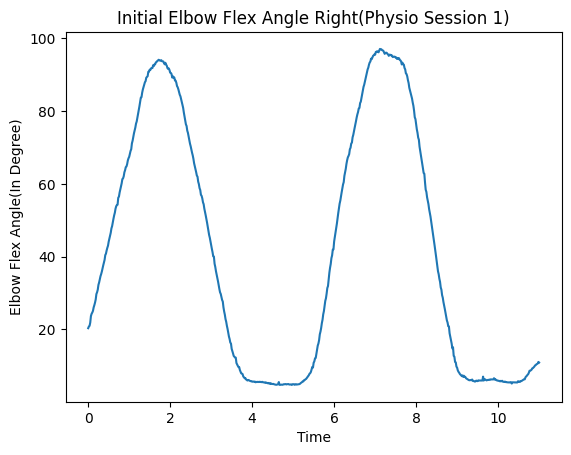

In [12]:
import matplotlib.pyplot as plt

plt.plot(time1, elb_1)
plt.xlabel('Time')
plt.ylabel('Elbow Flex Angle(In Degree)')
plt.title("Initial Elbow Flex Angle Right(Physio Session 1)")

### Elbow Rotation Final Analysis

In [13]:
data = readKinematicsData("C:/Users/Jatin/Desktop/Engineering/ROBOTICS PROGRAM NUS/PROJECT/OpenCAP/DATA/NUS_PROJECT_DATA/OpenSimData/Kinematics/Elbow_Final.mot")

In [14]:
data

{'nRows': '539\n',
 'nColumns': '36\n',
 'inDegrees': 'yes\n',
 'Units': 'Units are S.I. units (second, meters, Newtons, ...)\n',
 'time': ['      0.00000000',
  '      0.01666670',
  '      0.03333330',
  '      0.05000000',
  '      0.06666670',
  '      0.08333330',
  '      0.10000000',
  '      0.11666670',
  '      0.13333330',
  '      0.15000000',
  '      0.16666670',
  '      0.18333330',
  '      0.20000000',
  '      0.21666670',
  '      0.23333330',
  '      0.25000000',
  '      0.26666670',
  '      0.28333330',
  '      0.30000000',
  '      0.31666670',
  '      0.33333330',
  '      0.35000000',
  '      0.36666670',
  '      0.38333330',
  '      0.40000000',
  '      0.41666670',
  '      0.43333330',
  '      0.45000000',
  '      0.46666670',
  '      0.48333330',
  '      0.50000000',
  '      0.51666670',
  '      0.53333330',
  '      0.55000000',
  '      0.56666670',
  '      0.58333330',
  '      0.60000000',
  '      0.61666670',
  '      0.63333330',
  ' 

In [15]:
time2 = data["time"]
time2 = [float(i) for i in time2]
time2

[0.0,
 0.0166667,
 0.0333333,
 0.05,
 0.0666667,
 0.0833333,
 0.1,
 0.1166667,
 0.1333333,
 0.15,
 0.1666667,
 0.1833333,
 0.2,
 0.2166667,
 0.2333333,
 0.25,
 0.2666667,
 0.2833333,
 0.3,
 0.3166667,
 0.3333333,
 0.35,
 0.3666667,
 0.3833333,
 0.4,
 0.4166667,
 0.4333333,
 0.45,
 0.4666667,
 0.4833333,
 0.5,
 0.5166667,
 0.5333333,
 0.55,
 0.5666667,
 0.5833333,
 0.6,
 0.6166667,
 0.6333333,
 0.65,
 0.6666667,
 0.6833333,
 0.7,
 0.7166667,
 0.7333333,
 0.75,
 0.7666667,
 0.7833333,
 0.8,
 0.8166667,
 0.8333333,
 0.85,
 0.8666667,
 0.8833333,
 0.9,
 0.9166667,
 0.9333333,
 0.95,
 0.9666667,
 0.9833333,
 1.0,
 1.0166667,
 1.0333333,
 1.05,
 1.0666667,
 1.0833333,
 1.1,
 1.1166667,
 1.1333333,
 1.15,
 1.1666667,
 1.1833333,
 1.2,
 1.2166667,
 1.2333333,
 1.25,
 1.2666667,
 1.2833333,
 1.3,
 1.3166667,
 1.3333333,
 1.35,
 1.3666667,
 1.3833333,
 1.4,
 1.4166667,
 1.4333333,
 1.45,
 1.4666667,
 1.4833333,
 1.5,
 1.5166667,
 1.5333333,
 1.55,
 1.5666667,
 1.5833333,
 1.6,
 1.6166667,
 1.633

In [16]:
elb_2 = data["elbow_flex_r"]
elb_2 = [float(i) for i in elb_2]

In [17]:
elb_2

[15.13524409,
 15.3922561,
 15.54444081,
 16.42444538,
 17.25739685,
 17.29594504,
 18.2447743,
 18.22858055,
 18.37241282,
 19.43846791,
 19.86098639,
 21.0171575,
 22.80666044,
 24.2727214,
 25.64227909,
 26.98416848,
 29.05805291,
 32.17199603,
 34.16093756,
 37.13422157,
 39.62048675,
 42.4347639,
 44.97946995,
 47.7854571,
 50.91876873,
 53.8550359,
 56.3560836,
 58.11154593,
 60.534078,
 63.03084556,
 64.40066874,
 65.47555658,
 67.36050601,
 69.172418,
 71.76072402,
 73.46734509,
 74.76229942,
 77.14316117,
 79.09337983,
 80.85479735,
 82.58421856,
 84.61527128,
 87.65910779,
 89.79304929,
 91.52988848,
 93.13335135,
 96.11910234,
 98.06480649,
 101.08392064,
 103.14360054,
 105.92956901,
 108.22100513,
 110.15222517,
 112.14774442,
 114.16025337,
 115.70499067,
 116.51558263,
 118.78960755,
 120.39006982,
 121.92495703,
 123.4991742,
 124.91258874,
 126.16015054,
 127.47927039,
 128.6069869,
 129.71707492,
 130.66298338,
 131.31845481,
 132.50755195,
 133.41747836,
 133.6980073

Text(0.5, 1.0, 'Final Elbow Flex Angle Right(Physio Session 2)')

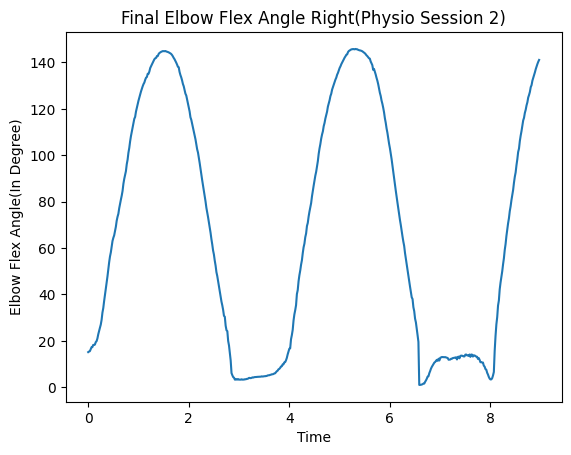

In [20]:
import matplotlib.pyplot as plt

plt.plot(time2, elb_2)
plt.xlabel("Time")
plt.ylabel("Elbow Flex Angle(In Degree)")
plt.title("Final Elbow Flex Angle Right(Physio Session 2)")

### Plotting Both Together for Analysis

In [141]:
print(len(time))
print(len(elb_1))

539
661


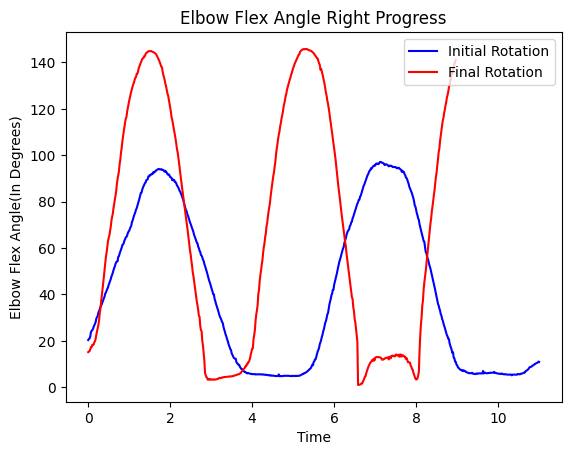

In [21]:
plt.plot(time1, elb_1, label='Initial Rotation', color='blue')
plt.plot(time2, elb_2, label='Final Rotation', color='red')
plt.title("Elbow Flex Angle Right Progress")
plt.xlabel("Time")
plt.ylabel("Elbow Flex Angle(In Degrees)")
plt.legend()
plt.show()

### Progress Analysis

In [147]:
max1 = max(elb_1)
max2 = max(elb_2)

#### Max at First Session

In [148]:
max1

97.10640361

#### Max at Second Session

In [149]:
max2

145.82143322

#### Graph to show progress

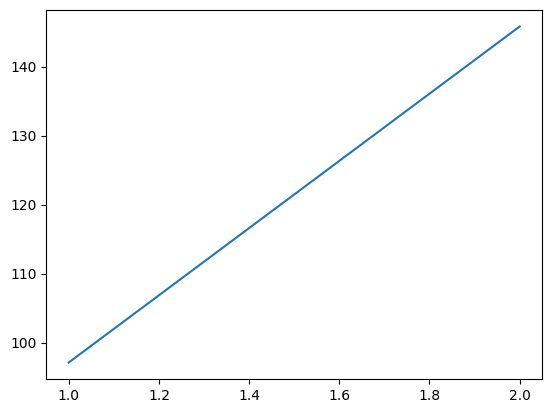

In [151]:
data = [max1, max2]
time = [1, 2]

plt.plot(time, data)